In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sagemaker
import boto3
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns',None) # To display all columns
pd.set_option('display.max_rows',None) # To display all columns
client = boto3.client('s3')
import feather
import matplotlib.pyplot as plt

In [2]:
path = 's3://haseebdata/EDNET DATA/Ednet feather files/KT3.ftr'

In [3]:
df = pd.read_feather(path)

In [4]:
df.head()

,timestamp,action_type,item_id,source,user_answer,platform,user_iD
0,2019-08-06 12:55:51.269,enter,b3544,diagnosis,None,mobile,1
1,2019-08-06 12:56:27.972,respond,q5012,diagnosis,b,mobile,1
2,2019-08-06 12:56:34.904,submit,b3544,diagnosis,None,mobile,1
3,2019-08-06 12:56:35.001,enter,b3238,diagnosis,None,mobile,1
4,2019-08-06 12:56:58.682,respond,q4706,diagnosis,c,mobile,1


In [5]:
df.dtypes

timestamp      datetime64[ns]
action_type            object
item_id                object
source                 object
user_answer            object
platform               object
user_iD                 int32
dtype: object

In [6]:
#df['user_iD'].nunique

In [7]:
A = df.loc[df['action_type'].isin(['respond'])]

In [8]:
A.head()

,timestamp,action_type,item_id,source,user_answer,platform,user_iD
1,2019-08-06 12:56:27.972,respond,q5012,diagnosis,b,mobile,1
4,2019-08-06 12:56:58.682,respond,q4706,diagnosis,c,mobile,1
7,2019-08-06 12:58:10.094,respond,q4366,diagnosis,b,mobile,1
10,2019-08-06 12:58:57.361,respond,q4829,diagnosis,a,mobile,1
13,2019-08-06 12:59:55.328,respond,q6528,diagnosis,b,mobile,1


In [9]:
A.shape

(23371166, 7)

In [13]:
dates = A.groupby("action_type").count() # Number of occurrences of each date
print(dates)

             timestamp   item_id    source  user_answer  platform   user_iD
action_type                                                                
respond       23371166  23371166  23371166     23371166  23371166  23371166


In [14]:
dates["uniques"] = A.groupby("action_type").user_iD.nunique() # Number of unique users per day
print (dates["uniques"])

action_type
respond    289263
Name: uniques, dtype: int64


In [15]:
dates["ratio"] = dates.user_iD/dates.uniques # Ratio of the two

In [16]:
print(dates["ratio"])

action_type
respond    80.79556
Name: ratio, dtype: float64


In [ ]:
#A.groupby('user_iD').id.transform(lambda x : x.duplicated(keep=False).sum())

In [10]:
B_userid_counts = A.user_iD.value_counts()
mask = B_userid_counts >= 30
filtered_userids = mask[mask].index

B = A[A.user_iD.isin(filtered_userids)]

In [11]:
B.head()

,timestamp,action_type,item_id,source,user_answer,platform,user_iD
1,2019-08-06 12:56:27.972,respond,q5012,diagnosis,b,mobile,1
4,2019-08-06 12:56:58.682,respond,q4706,diagnosis,c,mobile,1
7,2019-08-06 12:58:10.094,respond,q4366,diagnosis,b,mobile,1
10,2019-08-06 12:58:57.361,respond,q4829,diagnosis,a,mobile,1
13,2019-08-06 12:59:55.328,respond,q6528,diagnosis,b,mobile,1


In [12]:
B.shape

(21146812, 7)

In [ ]:
B['user_iD'].unique

In [ ]:
B['user_iD'].nunique

<AxesSubplot:>

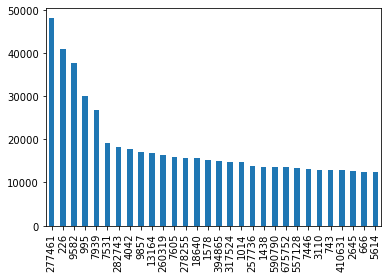

In [18]:
B['user_iD'].value_counts()[:30].plot(kind='bar')

In [15]:
A_userid_counts = A.user_iD.value_counts()
A_mask = A_userid_counts >= 100
filtered_userid = A_mask[A_mask].index

C = A[A.user_iD.isin(filtered_userid)]

In [16]:
C.head()

,timestamp,action_type,item_id,source,user_answer,platform,user_iD
1,2019-08-06 12:56:27.972,respond,q5012,diagnosis,b,mobile,1
4,2019-08-06 12:56:58.682,respond,q4706,diagnosis,c,mobile,1
7,2019-08-06 12:58:10.094,respond,q4366,diagnosis,b,mobile,1
10,2019-08-06 12:58:57.361,respond,q4829,diagnosis,a,mobile,1
13,2019-08-06 12:59:55.328,respond,q6528,diagnosis,b,mobile,1


In [17]:
C.shape

(19576684, 7)

In [ ]:
C['user_iD'].unique

In [ ]:
C['user_iD'].nunique

<AxesSubplot:>

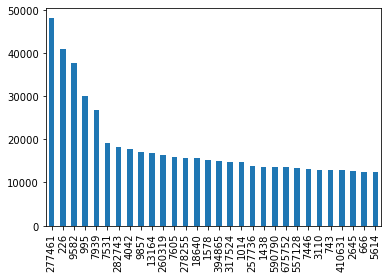

In [16]:
C['user_iD'].value_counts()[:30].plot(kind='bar')

<AxesSubplot:>

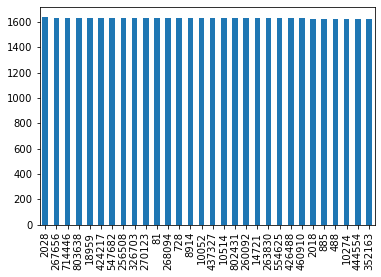

In [22]:
C['user_iD'].value_counts()[2500:2530].plot(kind='bar')

In [ ]:
D_userid_counts = C.user_iD.value_counts()
mask = D_userid_counts = 10
#filtered_userids = mask[mask].index
filter_userid = C.drop(mask[mask].index)
D = C[C.user_iD.isin(filter_userid)]

In [22]:
D_userid_counts = C.user_iD.value_counts()
D_mask = D_userid_counts = 10
filter_userid = C.drop(D_mask[D_mask].index, inplace = True)

D = C[C.user_iD.isin(filter_userid)]

TypeError: 'int' object is not subscriptable

In [ ]:
Z= len(pd.value_counts(C['item_id']))
print(Z)

In [ ]:
counter_u100 = 0
for key, item_id in C['item_id'].iteritems():
    try:
        if C.loc[key, 'user_answer'] == questions.loc[questions['question_id'] == item_id, 'correct_answer'].values[0]:
            counter_u100 += 1
        else:
            pass  # put here whatever you want to do if the answer is wrong
    except Exception:
        pass # put here whatever you want to do if the question id from DF(B) is not in DF(questions)